In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
import csv
import datetime
import moment

# import api key
from config import api_key
   
# Weather URL
#History weather bulk for ATL from January 01, 2014 to December 31, 2018
weather_url = "http://history.openweathermap.org//storage/fdecc63ecf8b14588f3161f4e7a8414b.json"



# make request and store response
response = requests.get(weather_url)

# print status code
print(response.status_code)


200


In [48]:
#JSONify response
response_json = response.json()

In [49]:
# print first article
print(f"The first response is {json.dumps(response_json[0], indent=4)}.")

The first response is {
    "city_id": 4180439,
    "main": {
        "temp": 294.03,
        "temp_min": 293.15,
        "temp_max": 295.15,
        "pressure": 1006,
        "humidity": 94
    },
    "wind": {
        "speed": 3,
        "deg": 110
    },
    "clouds": {
        "all": 100
    },
    "weather": [
        {
            "id": 701,
            "main": "Mist",
            "description": "mist",
            "icon": "50d"
        },
        {
            "id": 300,
            "main": "Drizzle",
            "description": "light intensity drizzle",
            "icon": "09d"
        },
        {
            "id": 501,
            "main": "Rain",
            "description": "moderate rain",
            "icon": "10d"
        },
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10d"
        }
    ],
    "dt": 1349096400,
    "dt_iso": "2012-10-01 13:00:00 +0000 UTC"
}.


In [50]:
#NotebookApp.iopub_data_rate_limit = 10000000

# count of responses
print(f"We received {len(response_json)} responses.")
unixDict = {}
for entry in response_json:
    try:
        unixDict[entry['dt']] = {
            'temp_max': entry['main']['temp_max'],
            'wind_speed': entry['wind']['speed'],
            'weather_main': entry['weather'][0]['main']
        }
    except:
        print(f'no data for {entry["dt"]}')
print(unixDict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [51]:
# reference to CSV file
ATL_csv = os.path.join("..","main_ATL","ATL_Unix.csv")



with open(ATL_csv, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    print(csvreader)

ATL_crime_df = pd.read_csv(ATL_csv)
ATL_crime_df.head()

,Unnamed: 0,Location,Date,Indoor/Outdoor,Crime Code,Unix Date
0,0,"(39.2800000000, -76.6302800000)",12/31/2014,I,5A,1420002000
1,1,"(39.3068400000, -76.6346000000)",12/31/2014,I,5A,1420002000
2,2,"(39.3663800000, -76.6012400000)",12/31/2014,I,5A,1420002000
3,3,"(39.3104400000, -76.5995200000)",12/31/2014,I,5A,1420002000
4,4,"(39.3712200000, -76.5845100000)",12/31/2014,O,6B,1420002000


In [52]:
ATL_crime_df["Temp_Max"] = ""
ATL_crime_df["Wind_Speed"] = ""
ATL_crime_df["Weather_Type"] = ""
ATL_crime_df.head()

,Unnamed: 0,Location,Date,Indoor/Outdoor,Crime Code,Unix Date,Temp_Max,Wind_Speed,Weather_Type
0,0,"(39.2800000000, -76.6302800000)",12/31/2014,I,5A,1420002000,,,
1,1,"(39.3068400000, -76.6346000000)",12/31/2014,I,5A,1420002000,,,
2,2,"(39.3663800000, -76.6012400000)",12/31/2014,I,5A,1420002000,,,
3,3,"(39.3104400000, -76.5995200000)",12/31/2014,I,5A,1420002000,,,
4,4,"(39.3712200000, -76.5845100000)",12/31/2014,O,6B,1420002000,,,


In [53]:
# create a params dict that will be updated with weather data each iteration
params = {"key": api_key}
weather_url = "http://history.openweathermap.org//storage/fdecc63ecf8b14588f3161f4e7a8414b.json"

In [54]:
# Use unix date to identify weather

def getWeather(t,val):
    #print(t['Unix Date'])
    try:
        return unixDict[t['Unix Date']][val]
    except:
        return 'N/A'

ATL_crime_df['Temp_Max'] = ATL_crime_df.apply(lambda row: getWeather(row,'temp_max'),axis=1)
ATL_crime_df['Wind_Speed'] = ATL_crime_df.apply(lambda row: getWeather(row, 'wind_speed'),axis=1)
ATL_crime_df['Weather_Type'] = ATL_crime_df.apply(lambda row: getWeather(row, 'weather_main'),axis=1)

In [55]:
ATL_crime_df_select = ATL_crime_df.iloc[39000, :]
ATL_crime_df_select

Unnamed: 0                                  39000
Location          (39.2952900000, -76.5911400000)
Date                                   03/05/2014
Indoor/Outdoor                                  O
Crime Code                                     4E
Unix Date                              1393995600
Temp_Max                                   278.15
Wind_Speed                                      3
Weather_Type                               Clouds
Name: 39000, dtype: object

In [56]:
weather_df = ATL_crime_df.loc[ATL_crime_df['Temp_Max'] != 'N/A']
weather_df.count()

Unnamed: 0        45728
Location          45415
Date              45728
Indoor/Outdoor    45320
Crime Code        45728
Unix Date         45728
Temp_Max          45728
Wind_Speed        45728
Weather_Type      45728
dtype: int64

In [57]:
weather_df["Temp_Max_Fahrenheit"] = (weather_df["Temp_Max"] - 273.15) * 9/5 + 32
weather_df.head()

weather_df["Temp_Max_Fahrenheit"] = weather_df["Temp_Max_Fahrenheit"].map("{:.2f}".format)

/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [58]:
in_out_weather = weather_df[["Indoor/Outdoor", "Weather_Type"]]
in_out_weather = in_out_weather.set_index("Weather_Type")
in_out_weather.groupby('Weather_Type')

print(in_out_weather.groupby('Weather_Type').head())



             Indoor/Outdoor
Weather_Type               
Mist                      I
Mist                      I
Mist                      O
Mist                      O
Mist                      I
Haze                      O
Haze                      I
Haze                      O
Haze                      I
Haze                      O
Clear                     I
Clear                     I
Clear                     O
Clear                     I
Clear                     I
Rain                      I
Rain                      I
Rain                      O
Rain                      I
Rain                      O
Clouds                    I
Clouds                    I
Clouds                    O
Clouds                    I
Clouds                    I
Thunderstorm              O
Thunderstorm              I
Thunderstorm              I
Thunderstorm              O
Thunderstorm              I
Drizzle                   I
Drizzle                   O
Drizzle                   I
Drizzle             

In [59]:
maker_group = weather_df.groupby('Crime Code')

# Count how many times each maker appears in our group
count_makers = maker_group['Crime Code'].count()

count_makers.sort_values(ascending=False, na_position='first')
count_makers


Crime Code
1F       233
1K        33
1O        13
2A       229
2B        18
3AF     1174
3AJF     153
3AJK       6
3AJO       9
3AK      253
3AO      192
3B       959
3BJ       33
3CF      371
3CK       61
3CO       34
3D       115
3EF       13
3EO        3
3F         6
3GF       36
3GK        9
3GO        3
3H        15
3JF      116
3JK       26
3JO       27
3K       248
3LF        6
3LO        5
        ... 
5C       448
5D      1365
5E       142
5F       141
6A        86
6B       578
6C      2403
6D      6210
6E      2085
6F       452
6G      2645
6H        21
6J      1922
6L        67
7A      4802
7B         8
7C       255
8AO       34
8AV       13
8BO        7
8BV        2
8CO        1
8EO        7
8FO       13
8FV        1
8GO        3
8GV        2
8H       123
8J        23
9S       487
Name: Crime Code, Length: 74, dtype: int64

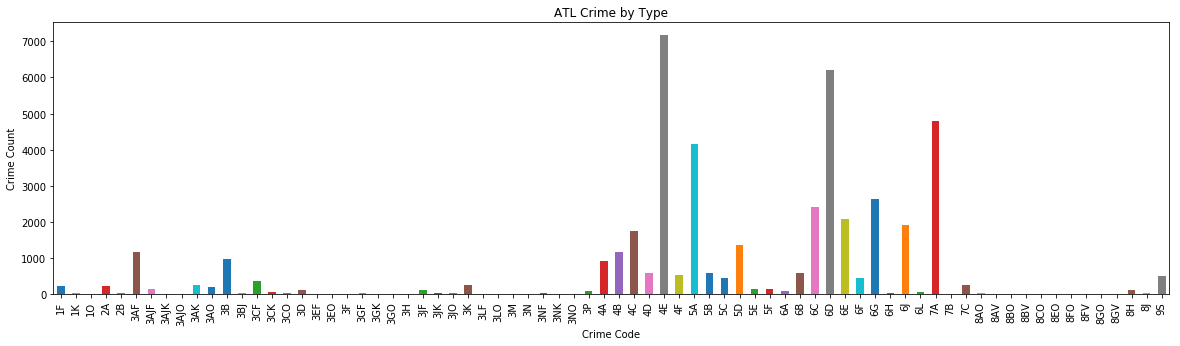

<Figure size 432x288 with 0 Axes>

In [60]:
count_chart = count_makers.plot(kind='bar', figsize =(20,5))
count_chart.set_xlabel("Crime Code")
count_chart.set_ylabel("Crime Count")
plt.title("ATL Crime by Type")
# Sets the x limits of the current chart
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.show()

plt.savefig("ATL_crime_by_type.png")


In [61]:
temp_group = weather_df.groupby('Temp_Max_Fahrenheit')

# Count how many times each maker appears in our group
count_temp = temp_group['Temp_Max_Fahrenheit'].count()

count_temp.sort_values(ascending=False, na_position='first')
print(temp_group)


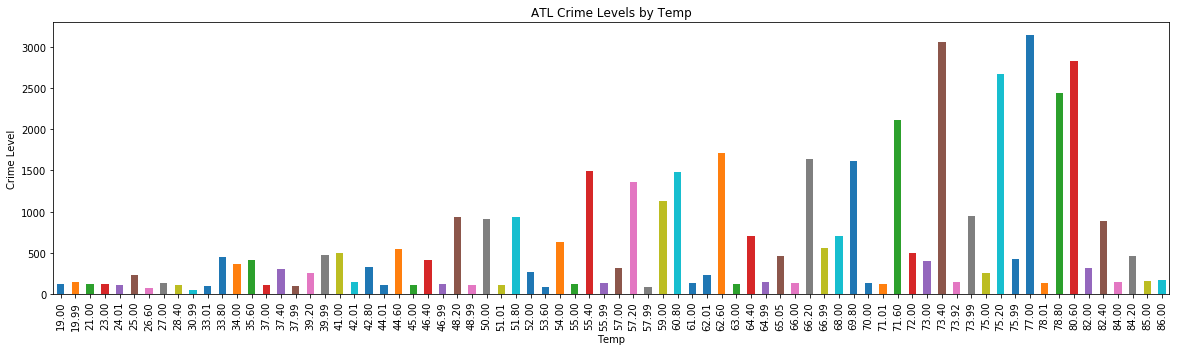

In [64]:
temp_chart = count_temp.plot(kind='bar', figsize =(20,5))
temp_chart.set_xlabel("Temp")
temp_chart.set_ylabel("Crime Level")
plt.title("ATL Crime Levels by Temp")
# Sets the x limits of the current chart
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.show()

In [ ]:
weather_df.groupby

45728


ValueError: 'explode' must be of length 'x'

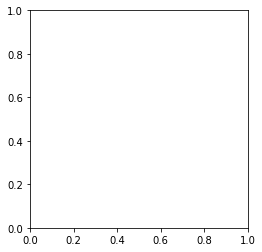

In [79]:
total_number_of_crimes = 0
total_number_of_crimes = len(weather_df)
print(total_number_of_crimes)

weather_groupby = weather_df.groupby("Weather_Type")
crimes_by_weather = weather_groupby.count()
percent_crime_in_clear = crimes_by_weather["Date"]["Clear"] / total_number_of_crimes
percent_crime_in_clouds = crimes_by_weather["Date"]["Clouds"] / total_number_of_crimes
percent_crime_in_drizzle = crimes_by_weather["Date"]["Drizzle"] / total_number_of_crimes
#percent_crime_in_fog = crimes_by_weather["Date"]["Fog"] / total_number_of_crimes
percent_crime_in_haze = crimes_by_weather["Date"]["Haze"] / total_number_of_crimes
percent_crime_in_Mist = crimes_by_weather["Date"]["Mist"] / total_number_of_crimes
percent_crime_in_Rain = crimes_by_weather["Date"]["Rain"] / total_number_of_crimes
#percent_crime_in_Smoke = crimes_by_weather["Date"]["Smoke"] / total_number_of_crimes
#percent_crime_in_Snow = crimes_by_weather["Date"]["Snow"] / total_number_of_crimes
percent_crime_in_Thunderstorm = crimes_by_weather["Date"]["Thunderstorm"] / total_number_of_crimes

weather_types = ["Clear", "Clouds", "Drizzle","Haze", "Mist", "Rain","Thunderstorm"]
colors = ('b', 'g', 'c', 'r', 'm', 'y', 'k', 'w', 'tan', 'olive')
explode = [.1,0,0,0,0,0,0,0,0,0]
crime_percents_by_weather = [percent_crime_in_clear, percent_crime_in_clouds, percent_crime_in_drizzle, \
                            percent_crime_in_haze, percent_crime_in_Mist, percent_crime_in_Rain, \
                            percent_crime_in_Thunderstorm]

percent_crime_by_weather = plt.pie(crime_percents_by_weather, explode=explode, labels=weather_types, colors=colors, autopct='%1.2f%%', radius=2)
# plt.figure(figsize=(10,7))
plt.tight_layout()
# plt.title("Percent Crime Type by Weather Type")#, fontsize='xx-large'
plt.legend(loc='upper right')
# plt.figure()
plt.axis("equal")
plt.figure()


190
[0.547550432276657, 0.1873198847262248, 0.011527377521613832, 0.008645533141210375, 0.09510086455331412, 0.1440922190201729, 0.005763688760806916]


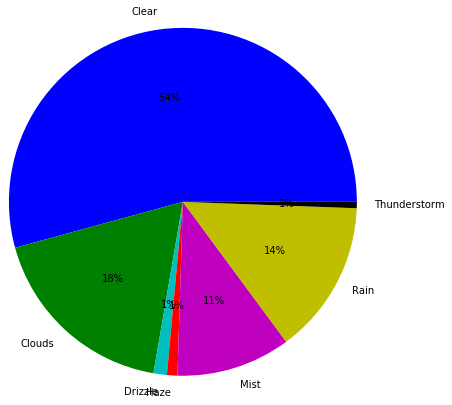

In [78]:
number_of_clear_days = 0
number_of_clouds_days = 0
number_of_drizzle_days = 0
number_of_fog_days = 0
number_of_haze_days = 0
number_of_mist_days = 0
number_of_rain_days = 0
number_of_smoke_days = 0
number_of_snow_days = 0
number_of_thunderstorm_days = 0

daily_weather_list = []
Date_groupby = weather_df.groupby("Date")

total_number_of_days = len(Date_groupby)
total_number_of_days
weather_counts = Date_groupby["Weather_Type"].unique()
# print(weather_counts.head(8))

for n in range(len(weather_counts)):
    daily_weather_list.append(weather_counts[n][0])

for n in range(len(weather_counts)):
    if weather_counts[n][0] == "Clear":
        number_of_clear_days += 1
    if weather_counts[n][0] == "Clouds":
        number_of_clouds_days += 1
    if weather_counts[n][0] == "Drizzle":
        number_of_drizzle_days += 1
    #if weather_counts[n][0] == "Fog":
    #    number_of_fog_days += 1
    if weather_counts[n][0] == "Haze":
        number_of_haze_days += 1
    if weather_counts[n][0] == "Mist":
        number_of_mist_days += 1
    if weather_counts[n][0] == "Rain":
        number_of_rain_days += 1
    #if weather_counts[n][0] == "Smoke":
    #    number_of_smoke_days += 1
   # if weather_counts[n][0] == "Snow":
    #    number_of_snow_days += 1
    if weather_counts[n][0] == "Thunderstorm":
        number_of_thunderstorm_days += 1

print(number_of_clear_days)
# daily_weather_list

percent_days_in_clear = number_of_clear_days / total_number_of_days
percent_days_in_clouds = number_of_clouds_days / total_number_of_days
percent_days_in_drizzle = number_of_drizzle_days / total_number_of_days
# percent_days_in_fog = number_of_fog_days / total_number_of_days
percent_days_in_haze = number_of_haze_days / total_number_of_days
percent_days_in_mist = number_of_mist_days / total_number_of_days
percent_days_in_rain = number_of_rain_days / total_number_of_days
# percent_days_in_smoke = number_of_smoke_days / total_number_of_days
# percent_days_in_snow = number_of_snow_days / total_number_of_days
percent_days_in_thunderstorm = number_of_thunderstorm_days / total_number_of_days

weather_types = ["Clear", "Clouds", "Drizzle","Haze", "Mist", "Rain","Thunderstorm"]
colors = ('b', 'g', 'c', 'r', 'm', 'y', 'k', 'w', 'tan', 'olive')
weather_percents_by_day = [percent_days_in_clear, percent_days_in_clouds, percent_days_in_drizzle, \
                            percent_days_in_haze, percent_days_in_mist, percent_days_in_rain, \
                            percent_days_in_thunderstorm]

print(weather_percents_by_day)

plt.pie(crime_percents_by_weather, explode=None, labels=weather_types, colors=colors, autopct='%1.0f%%', radius=2)
plt.show()


In [89]:
date_groupby = weather_df.groupby(["Date", "Weather_Type"])
date_groupby_counts = date_groupby.count()
date_groupby_counts.sort_values("Location", ascending=True)


,,Unnamed: 0,Location,Indoor/Outdoor,Crime Code,Unix Date,Temp_Max,Wind_Speed,Temp_Max_Fahrenheit
Date,Weather_Type,,,,,,,,
02/13/2014,Clouds,46,45,46,46,46,46,46,46
03/03/2014,Clear,59,57,59,59,59,59,59,59
01/03/2014,Clear,71,67,70,71,71,71,71,71
02/09/2014,Clear,79,79,79,79,79,79,79,79
02/14/2014,Rain,79,79,77,79,79,79,79,79
01/21/2014,Clear,81,81,77,81,81,81,81,81
02/16/2014,Clear,81,81,81,81,81,81,81,81
01/07/2014,Clear,84,84,82,84,84,84,84,84
03/17/2014,Rain,84,84,83,84,84,84,84,84
